# Project Preprocessing of Data 

In [3]:
#! pip install geopandas

     |████████████████████████████████| 1.1 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 86 kB/s  eta 0:00:01     |█▍                              | 337 kB 5.8 MB/s eta 0:00:02     |███████████████████▌            | 4.7 MB 5.8 MB/s eta 0:00:01     |███████████████████████████▊    | 6.7 MB 5.8 MB/s eta 0:00:01     |████████████████████████████▌   | 7.0 MB 863 kB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 19.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.6 MB 15 kB/s  eta 0:00:01    |███████▍                        | 3.9 MB 6.6 MB/s eta 0:00:02     |████████                        | 4.1 MB 6.6 MB/s eta 0:00:02     |████████▏                       | 4.2 MB 6.6 MB/s eta 0:00:02     |███████████▏                    | 5.8 MB 3.8 MB/s eta 0:00:03     |██████████████▌                 | 7.6 MB 3.8 MB/s eta 0:00:03     |████████████████▎               | 8.5 MB 3.8 MB/s eta 0:00:03     |███████████████████████▍        | 12.2 MB 2.4 MB/s e

In [8]:
#Run this in the terminal
#conda install -c conda-forge cartopy

     |████████████████████████████████| 368 kB 4.3 MB/s eta 0:00:01
  Using cached importlib_resources-5.10.0-py3-none-any.whl (34 kB)
     |████████████████████████████████| 269 kB 57.2 MB/s eta 0:00:01
     |████████████████████████████████| 963 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 1.6 MB/s eta 0:00:011
     |████████████████████████████████| 16.9 MB 4.5 MB/s eta 0:00:01    |██▏                             | 1.2 MB 4.5 MB/s eta 0:00:04     |████████████████████            | 10.6 MB 4.5 MB/s eta 0:00:02
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import geopandas as gpd
import matplotlib.animation as animation

In [4]:
df = pd.read_csv('Tweets.csv', sep=',')

In [16]:
df.shape

(14640, 15)

In [17]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

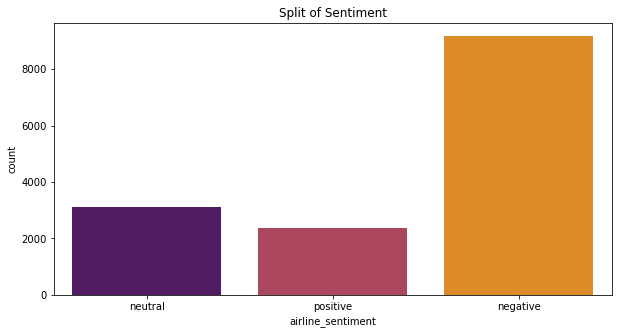

In [122]:
# Split of Sentiment

plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'airline_sentiment', palette = 'inferno')
plt.title('Split of Sentiment')
plt.show()

In [38]:
#df['airline_sentiment_confidence'].hist()

In [47]:
# Reasons for the Negative Tweets counts

df['negativereason'].value_counts().to_frame()

,negativereason
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178
Damaged Luggage,74


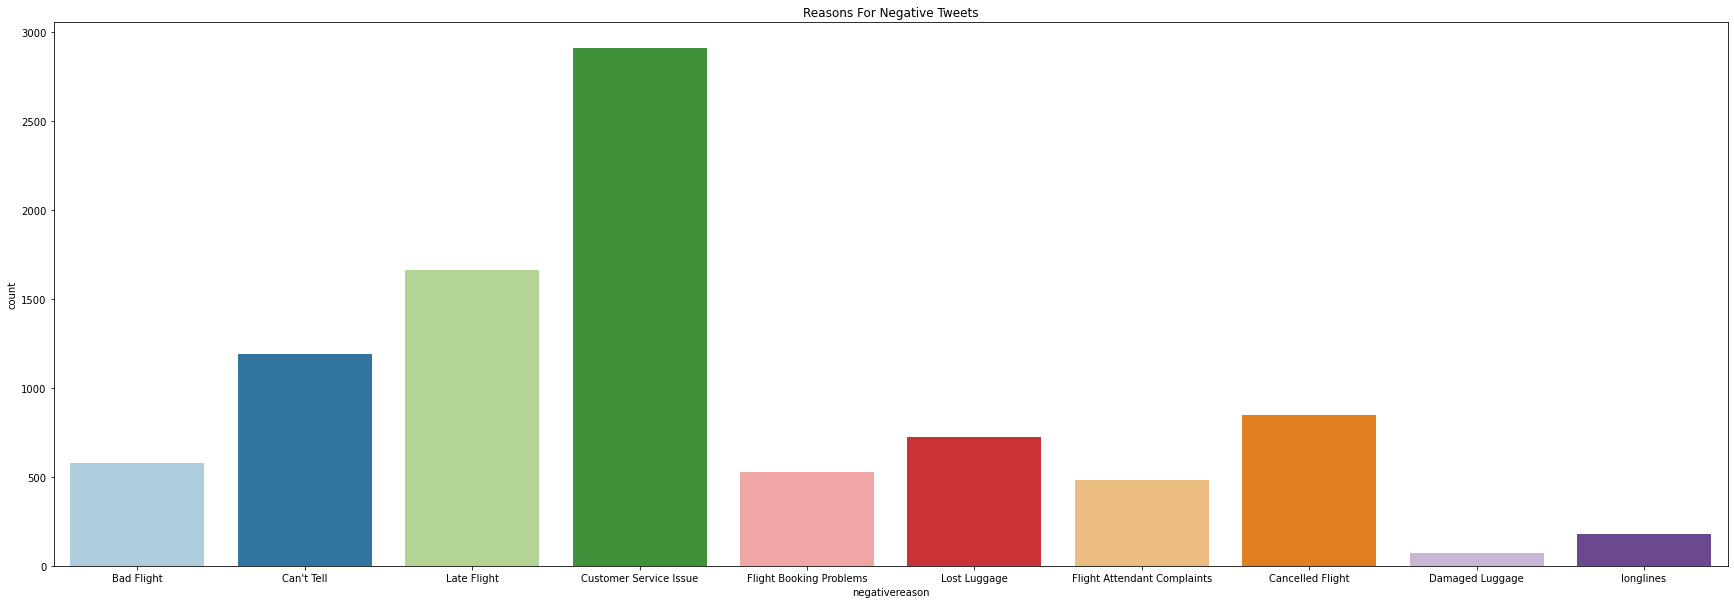

In [153]:
# Reasons for the Negative Tweets plot

plt.figure(figsize=(30, 10))
sns.countplot(data = df, x = 'negativereason', palette = "Paired")
plt.title('Reasons For Negative Tweets')
plt.show()

In [46]:
# Airlines counts
df['airline'].value_counts().to_frame()

,airline
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


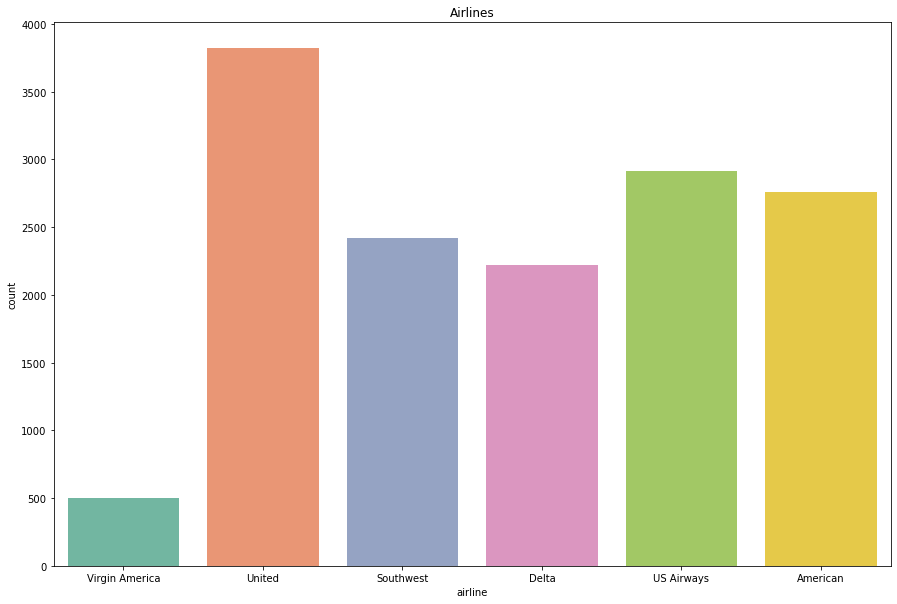

In [156]:
# Different Airlines
plt.figure(figsize=(15, 10))
sns.countplot(data = df, x = 'airline', palette = 'Set2')
plt.title('Airlines')
plt.show()

In [60]:
# Location counts
#df['user_timezone'].value_counts().loc[lambda x : x>3] 

In [64]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


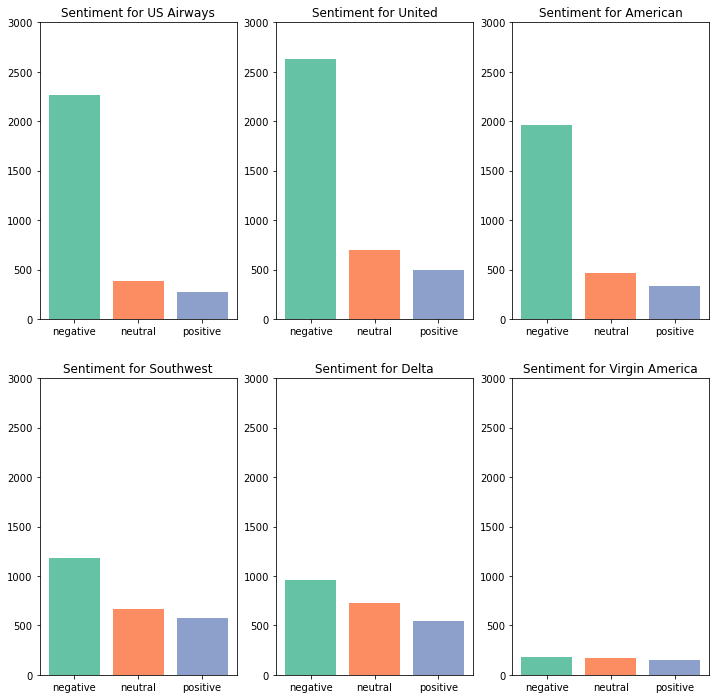

In [158]:
# The sentiment split for each airline
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color = sns.color_palette("Set2"))
    plt.xticks(Index,['negative','neutral','positive'])
    plt.title('Sentiment for '+i)
    plt.ylim((0,3000))

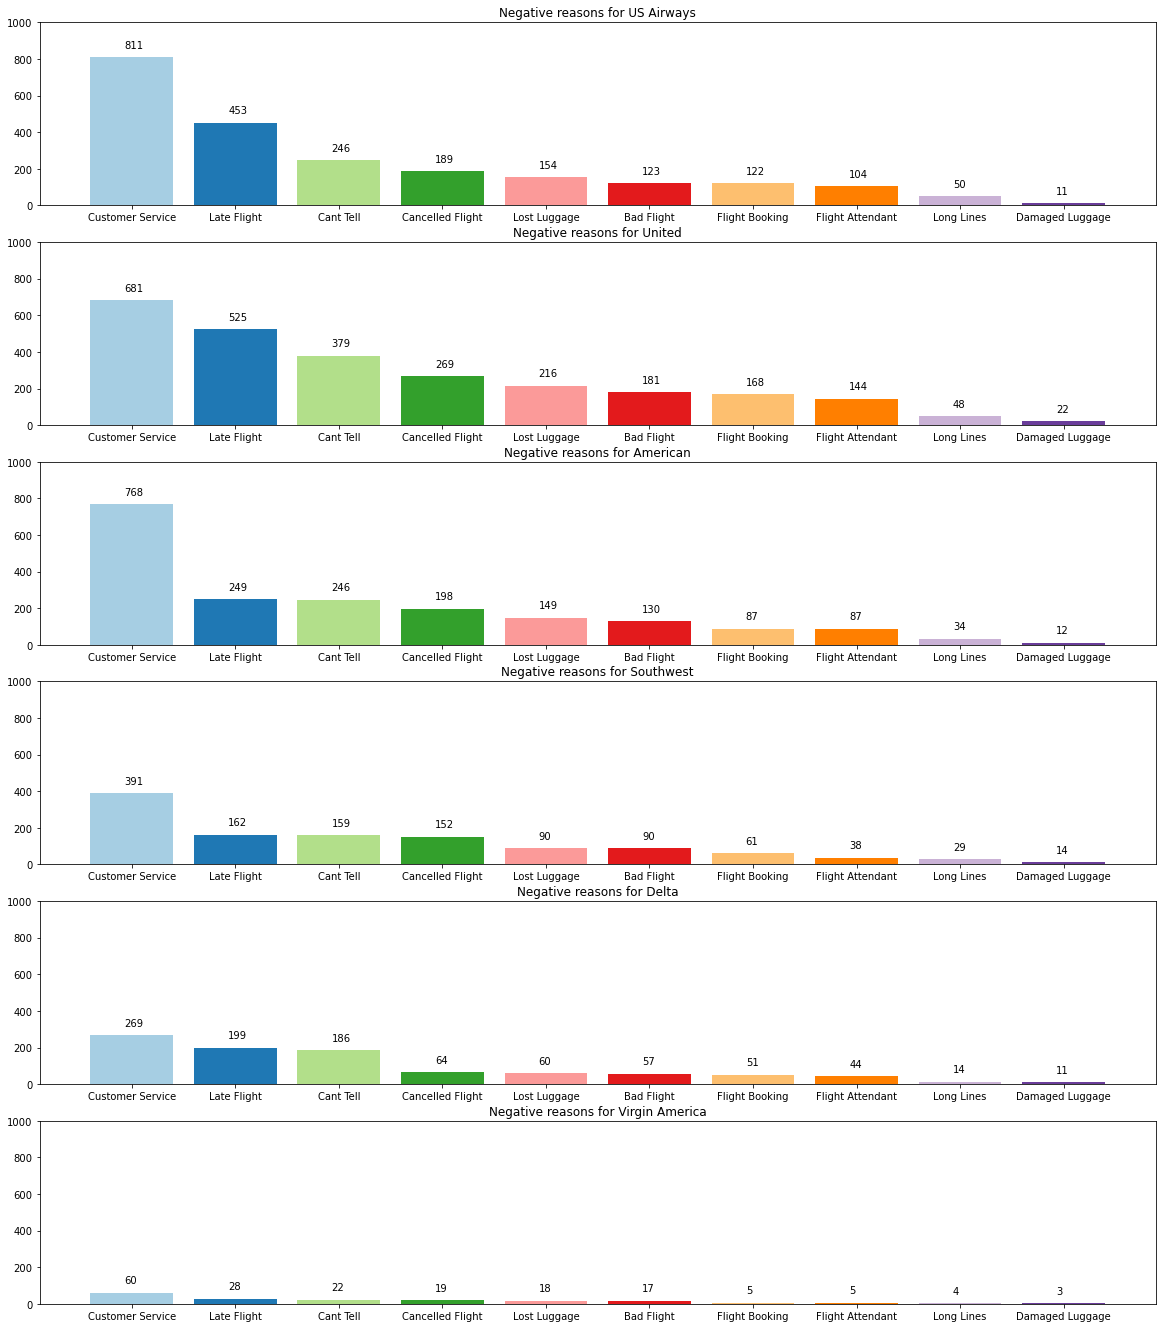

In [150]:
# The negative reason for each airline
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(20, 30))
for i in airlines:
    indices= airlines.index(i)
    ax = plt.subplot(10,1,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['negativereason'].value_counts()
    Index = [1,2,3,4,5,6,7,8,9,10]
    plt.bar(Index,count, color = sns.color_palette("Paired"))
    plt.xticks(Index,['Customer Service','Late Flight','Cant Tell', 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking', 'Flight Attendant', 'Long Lines', 'Damaged Luggage'])
    plt.title('Negative reasons for '+i)
    plt.ylim((0,1000))
    plt.subplots_adjust(bottom = 11, top = 12)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + 0.33, p.get_height() + 50), fontsize=10)

#plt.savefig("negativereason_airline.png")
    

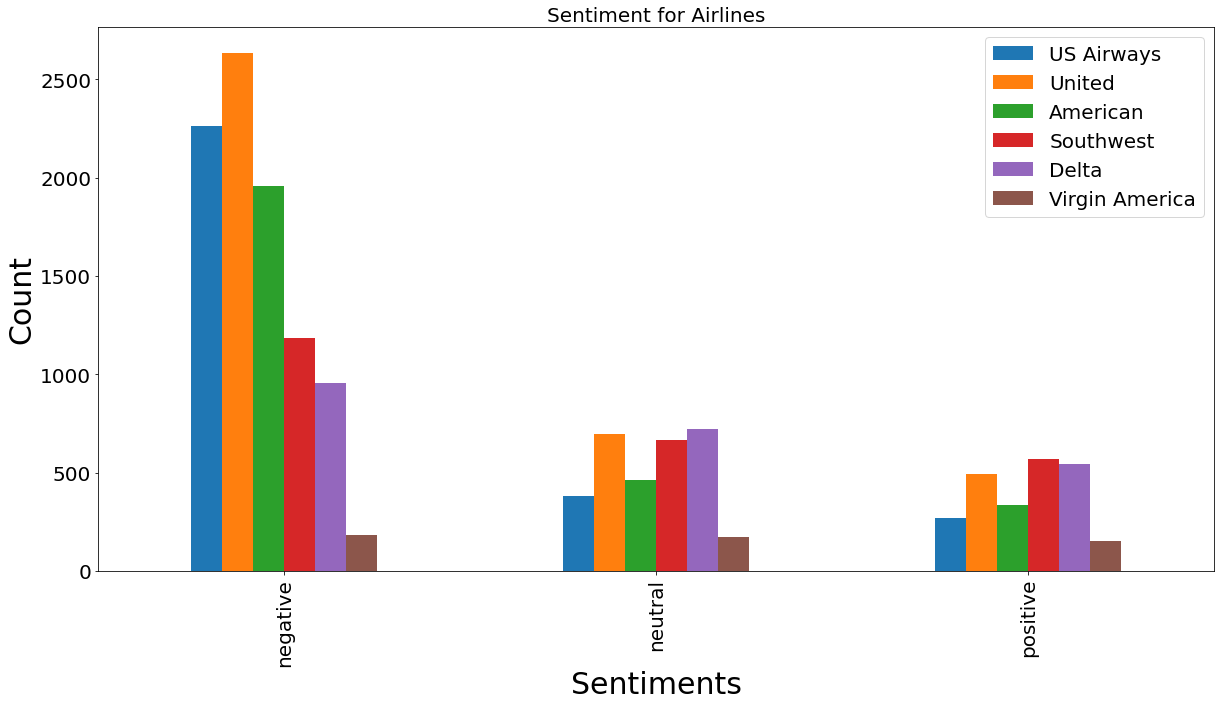

In [49]:
# The sentiment split for each airline
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

labels =  np.arange(2010,2015)
new_df = pd.DataFrame()
j = 0
for i in airlines:
    indices= airlines.index(i)
    new_df[i] = df[df['airline']==i].value_counts(df['airline_sentiment'])

plt.rcParams['figure.figsize'] = [20, 10]
new_df.plot(kind="bar", fontsize=20)
plt.title('Sentiment for Airlines',fontsize=20)
plt.xlabel('Sentiments', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.legend(fontsize=20)
plt.savefig('Sentiment for Airlines')

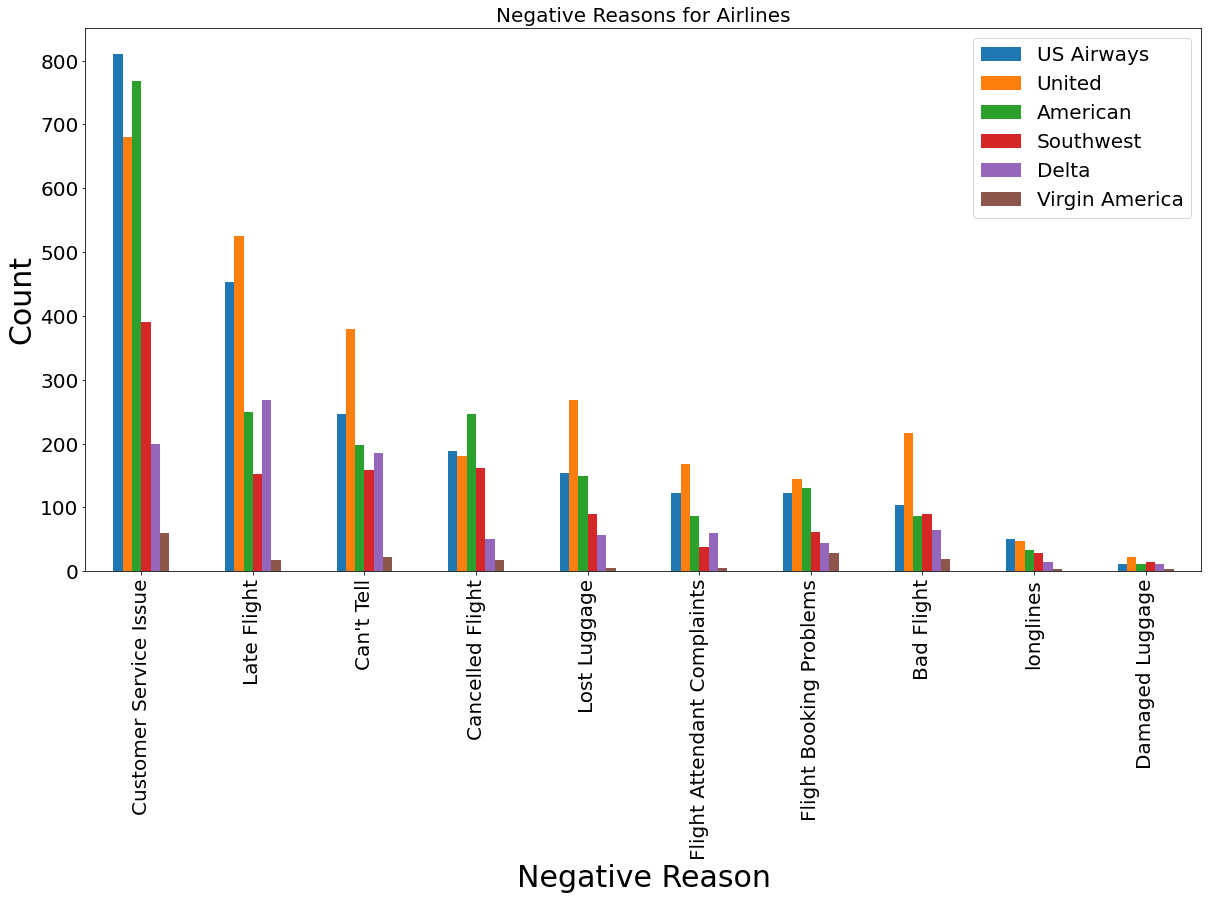

In [51]:
# The sentiment split for each airline
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

labels =  np.arange(2010,2015)
new_df = pd.DataFrame()
j = 0
for i in airlines:
    indices= airlines.index(i)
    new_df[i] = df[df['airline']==i].value_counts(df['negativereason'])

plt.rcParams['figure.figsize'] = [20, 10]
new_df.plot(kind="bar", fontsize=20)
plt.title('Negative Reasons for Airlines',fontsize=20)
plt.xlabel('Negative Reason', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.legend(fontsize=20)
plt.savefig('Negative Reasons for Airlines')

In [22]:
# We can look at the probability of how often bad review / negative review 
# comes based on the region and timeline (weekends, mornings or afternoon)
# something we can add if needed